In [38]:
%config IPCompleter.greedy=True #Helps with auto-complete

import numpy as np
import pandas as pd

data = pd.read_csv('/Users/arushgarg/Downloads/Code/ML_Course/01 Introduction/data/SAT_GPA.csv')

Explore the data

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAT Score  181 non-null    int64  
 1   GPA        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None


In [40]:
print(data[:5])

   SAT Score  GPA
0       1600  4.0
1       1593  4.0
2       1587  4.0
3       1580  4.0
4       1573  4.0


Visualise the Data

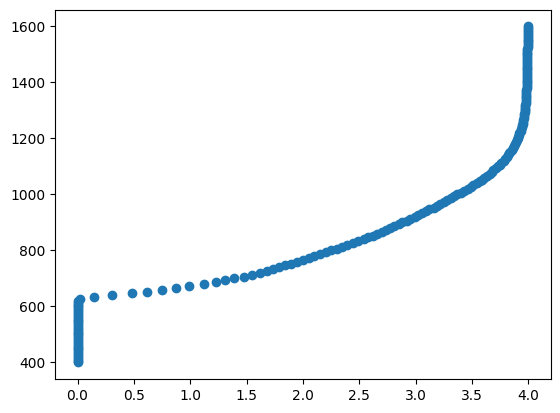

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data['GPA'], data['SAT Score'])
plt.show()

Since the data looks polynomial, we will add two new features

In [42]:
#New feature: GPA squared

gpa2 = data['GPA']**2
print(gpa2[:2])

0    16.0
1    16.0
Name: GPA, dtype: float64


In [43]:
#New feature: GPA cubed

gpa3 = data['GPA']**3
print(gpa3[:2])

0    64.0
1    64.0
Name: GPA, dtype: float64


In [44]:
data = pd.concat([data, gpa2, gpa3], axis=1, ignore_index=True)
print(data[:2])

      0    1     2     3
0  1600  4.0  16.0  64.0
1  1593  4.0  16.0  64.0


In [45]:
data.columns = ['SAT', 'GPA', 'GPA_Sqr', 'GPA_Cb']
print(data[:2])

    SAT  GPA  GPA_Sqr  GPA_Cb
0  1600  4.0     16.0    64.0
1  1593  4.0     16.0    64.0


In [46]:
#Split the data
import sklearn.model_selection as ms
features = data.drop('SAT', axis=1)

train_features, test_features, train_labels, test_labels = ms.train_test_split(features, data['SAT'], test_size=0.2)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(144, 3)
(37, 3)
(144,)
(37,)


In [47]:
#Train the model (its simpler than you think)
from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr = regr.fit(train_features, train_labels)

That's it! Model Trained!

In [48]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error as mse

train_predictions = regr.predict(train_features)

print("TRAIN Root Mean Squared Error: %.2f" % 
      (mse(train_labels, train_predictions)**0.5))

TRAIN Root Mean Squared Error: 83.52


In [49]:
test_predictions = regr.predict(test_features)

print("TEST Root Mean Squared Error: %.2f"
      % (mse(test_labels, test_predictions)**0.5))

TEST Root Mean Squared Error: 64.65


This error seems acceptable. If we continue, we risk overfitting the model

In [50]:
#This means your final result can be +- 110

#Try it yourself (replace 3.94 with your GPA):

gpa = 3.94
user_features = [[gpa, gpa**2, gpa**3]]
SAT_pred = int(regr.predict(user_features))
print(SAT_pred)

1346


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
pred = regr.predict(features)

Model Visualisation

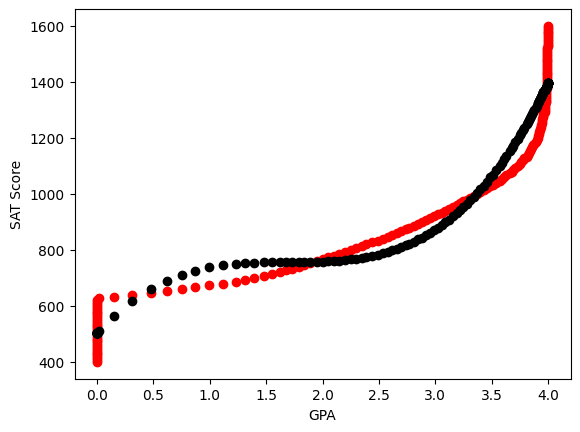

In [52]:
plt.scatter(data['GPA'], data['SAT'], color='red')
plt.scatter(data['GPA'], pred, color='black')
plt.xlabel('GPA')
plt.ylabel('SAT Score')

plt.show()